The dataset you chose is well-suited for Marketing Mix Modeling (MMM) because it provides a granular view of weekly media spend across multiple channels and corresponding sales data. Here’s a structured approach to performing MMM on this dataset:

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
df = pd.read_csv('../raw_data/sample_media_spend_data.csv')

In [5]:
df.head()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,349895.0107,73580,12072,682,59417
1,A,1/13/2018,787,904,110,506270.2176,11804,9499,853,56806
2,A,1/20/2018,81,970,742,430042.1538,52232,17048,759,48715
3,A,1/27/2018,25,575,65,417745.6658,78640,10207,942,72047
4,A,2/3/2018,565,284,295,408505.8012,40561,5834,658,56235


Identify independent variables (e.g., Facebook, Google Search Impressions, etc.) as the marketing channels.

Identify the dependent variable (e.g., Sales)

Look at other variables like time or overall views for additional insights.

In [6]:
df.columns

Index(['Division', 'Calendar_Week', 'Paid_Views', 'Organic_Views',
       'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions',
       'Affiliate_Impressions', 'Overall_Views', 'Sales'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.5+ KB


In [8]:
df.describe()

,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
count,3051.000000,3051.000000,3.051000e+03,3.051000e+03,3.051000e+03,3051.000000,3051.000000,3.051000e+03
mean,15093.941658,13355.673222,8.861738e+05,7.605094e+05,2.691269e+05,22910.902655,27980.914127,1.859014e+05
std,30785.884979,24079.399689,1.355076e+06,6.260141e+05,4.665117e+05,21617.637497,52054.976687,2.322079e+05
min,1.000000,1.000000,7.000000e+00,4.089445e+04,2.900000e+01,910.000000,2.000000,1.543600e+04
25%,537.000000,712.500000,1.698280e+05,3.784969e+05,5.707350e+04,9127.000000,747.000000,7.339350e+04
50%,2699.000000,4110.000000,4.905310e+05,5.909708e+05,1.275230e+05,16658.000000,7879.000000,1.135730e+05
75%,17358.000000,16230.500000,1.022622e+06,9.622466e+05,2.835050e+05,27486.500000,34111.500000,2.029755e+05
max,518190.000000,270453.000000,1.715044e+07,7.317730e+06,7.558435e+06,175791.000000,635057.000000,3.575430e+06


In [15]:
# Check for nans
nans_dict = {}
for col in df.columns:
    nans_dict[col] =  df[col].isna().sum()
nans_dict

{'Division': np.int64(0),
 'Calendar_Week': np.int64(0),
 'Paid_Views': np.int64(0),
 'Organic_Views': np.int64(0),
 'Google_Impressions': np.int64(0),
 'Email_Impressions': np.int64(0),
 'Facebook_Impressions': np.int64(0),
 'Affiliate_Impressions': np.int64(0),
 'Overall_Views': np.int64(0),
 'Sales': np.int64(0)}

In [16]:
df.isna().sum()

Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
dtype: int64

In [18]:
def get_num_cat_columns(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    num = df.select_dtypes(include=numerics).columns.to_list()
    cat = df.select_dtypes(include=['object']).columns.to_list()
    return num, cat

In [19]:
numeric_columns, categorical_columns  = get_num_cat_columns(df)
numeric_columns, categorical_columns

(['Paid_Views',
  'Organic_Views',
  'Google_Impressions',
  'Email_Impressions',
  'Facebook_Impressions',
  'Affiliate_Impressions',
  'Overall_Views',
  'Sales'],
 ['Division', 'Calendar_Week'])

In [20]:
for col in categorical_columns:
    print(df[col].value_counts())

Division
Z    226
B    113
Y    113
X    113
W    113
V    113
U    113
T    113
S    113
R    113
Q    113
P    113
O    113
A    113
M    113
L    113
K    113
J    113
I    113
H    113
G    113
F    113
E    113
D    113
C    113
N    113
Name: count, dtype: int64
Calendar_Week
1/6/2018     27
2/9/2019     27
8/10/2019    27
8/3/2019     27
7/27/2019    27
             ..
9/1/2018     27
8/25/2018    27
8/18/2018    27
8/11/2018    27
2/29/2020    27
Name: count, Length: 113, dtype: int64


# Visualizations

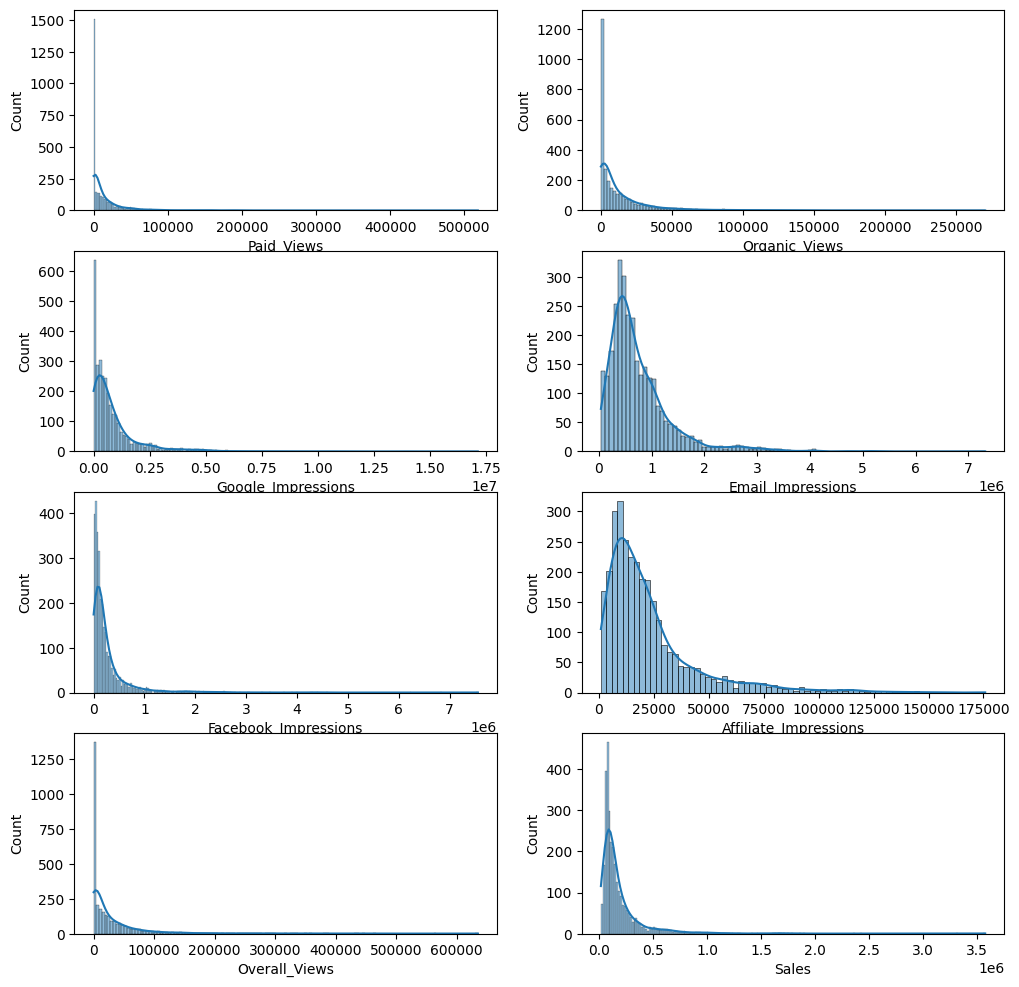

In [21]:
plt.figure(figsize=(12,12))
for n,col in enumerate(numeric_columns):
    plt.subplot(4,2,n+1)
    sns.histplot(df[col], kde =True)

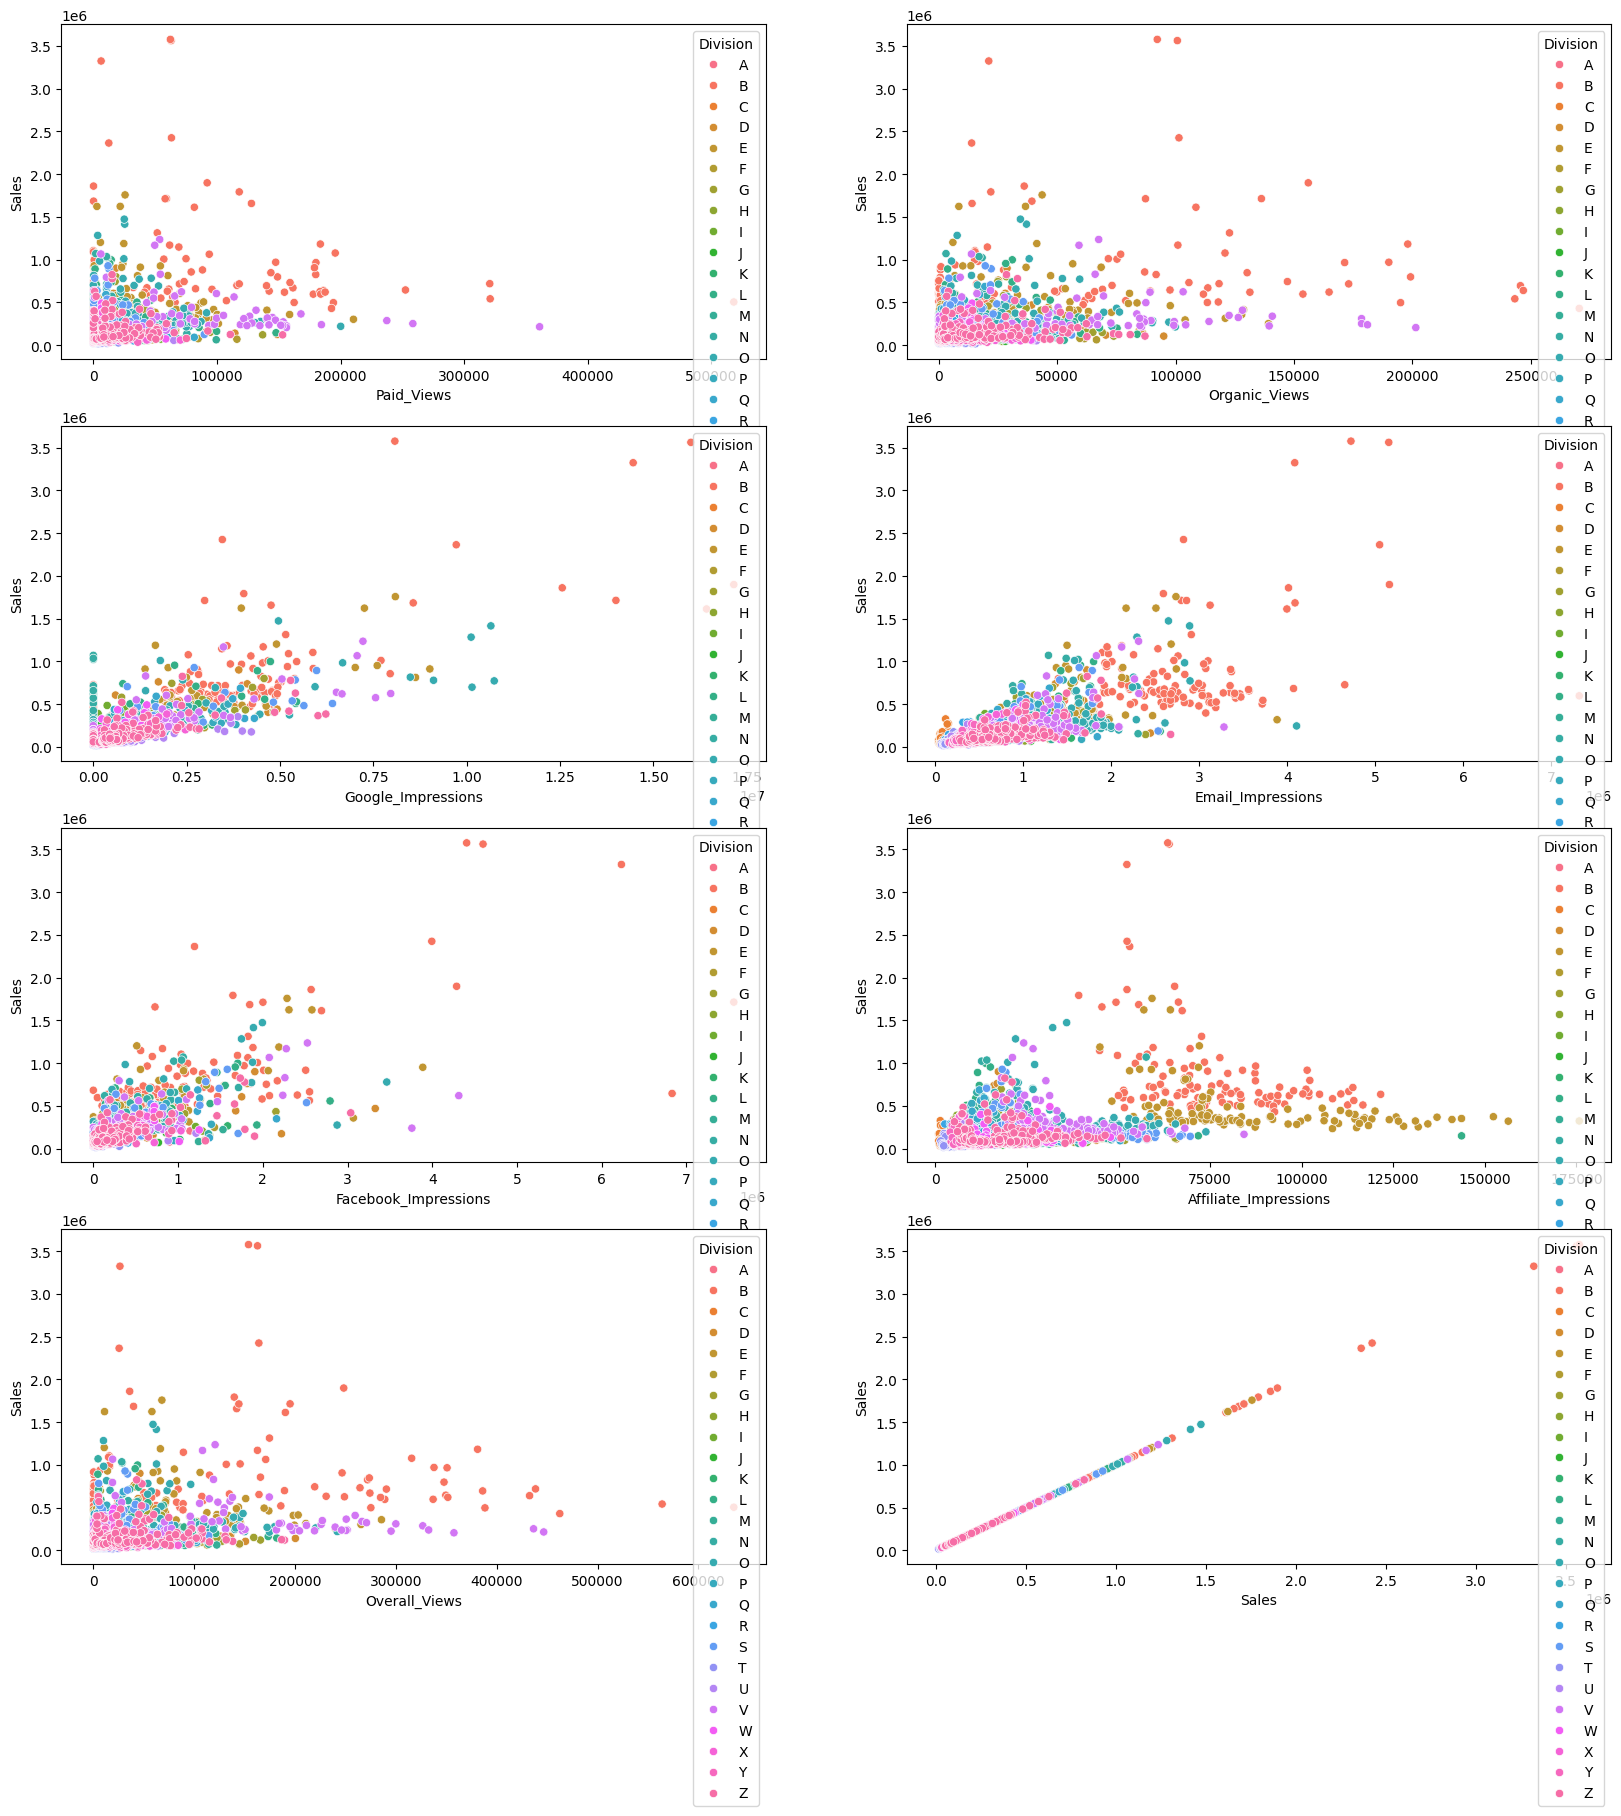

In [24]:
plt.figure(figsize=(20,20))
for n,col in enumerate(numeric_columns):
    plt.subplot(4,2,n+1)
    sns.scatterplot(x = df[col],
                    y= df['Sales'],
                    hue = df.Division, 
#                     palette = "rocket"
                   )

### Insights
Sales is directly proportional to (important features for model):
- facebook_impressions
- email_impressions
- google_impressions 
- affiliate_impressions

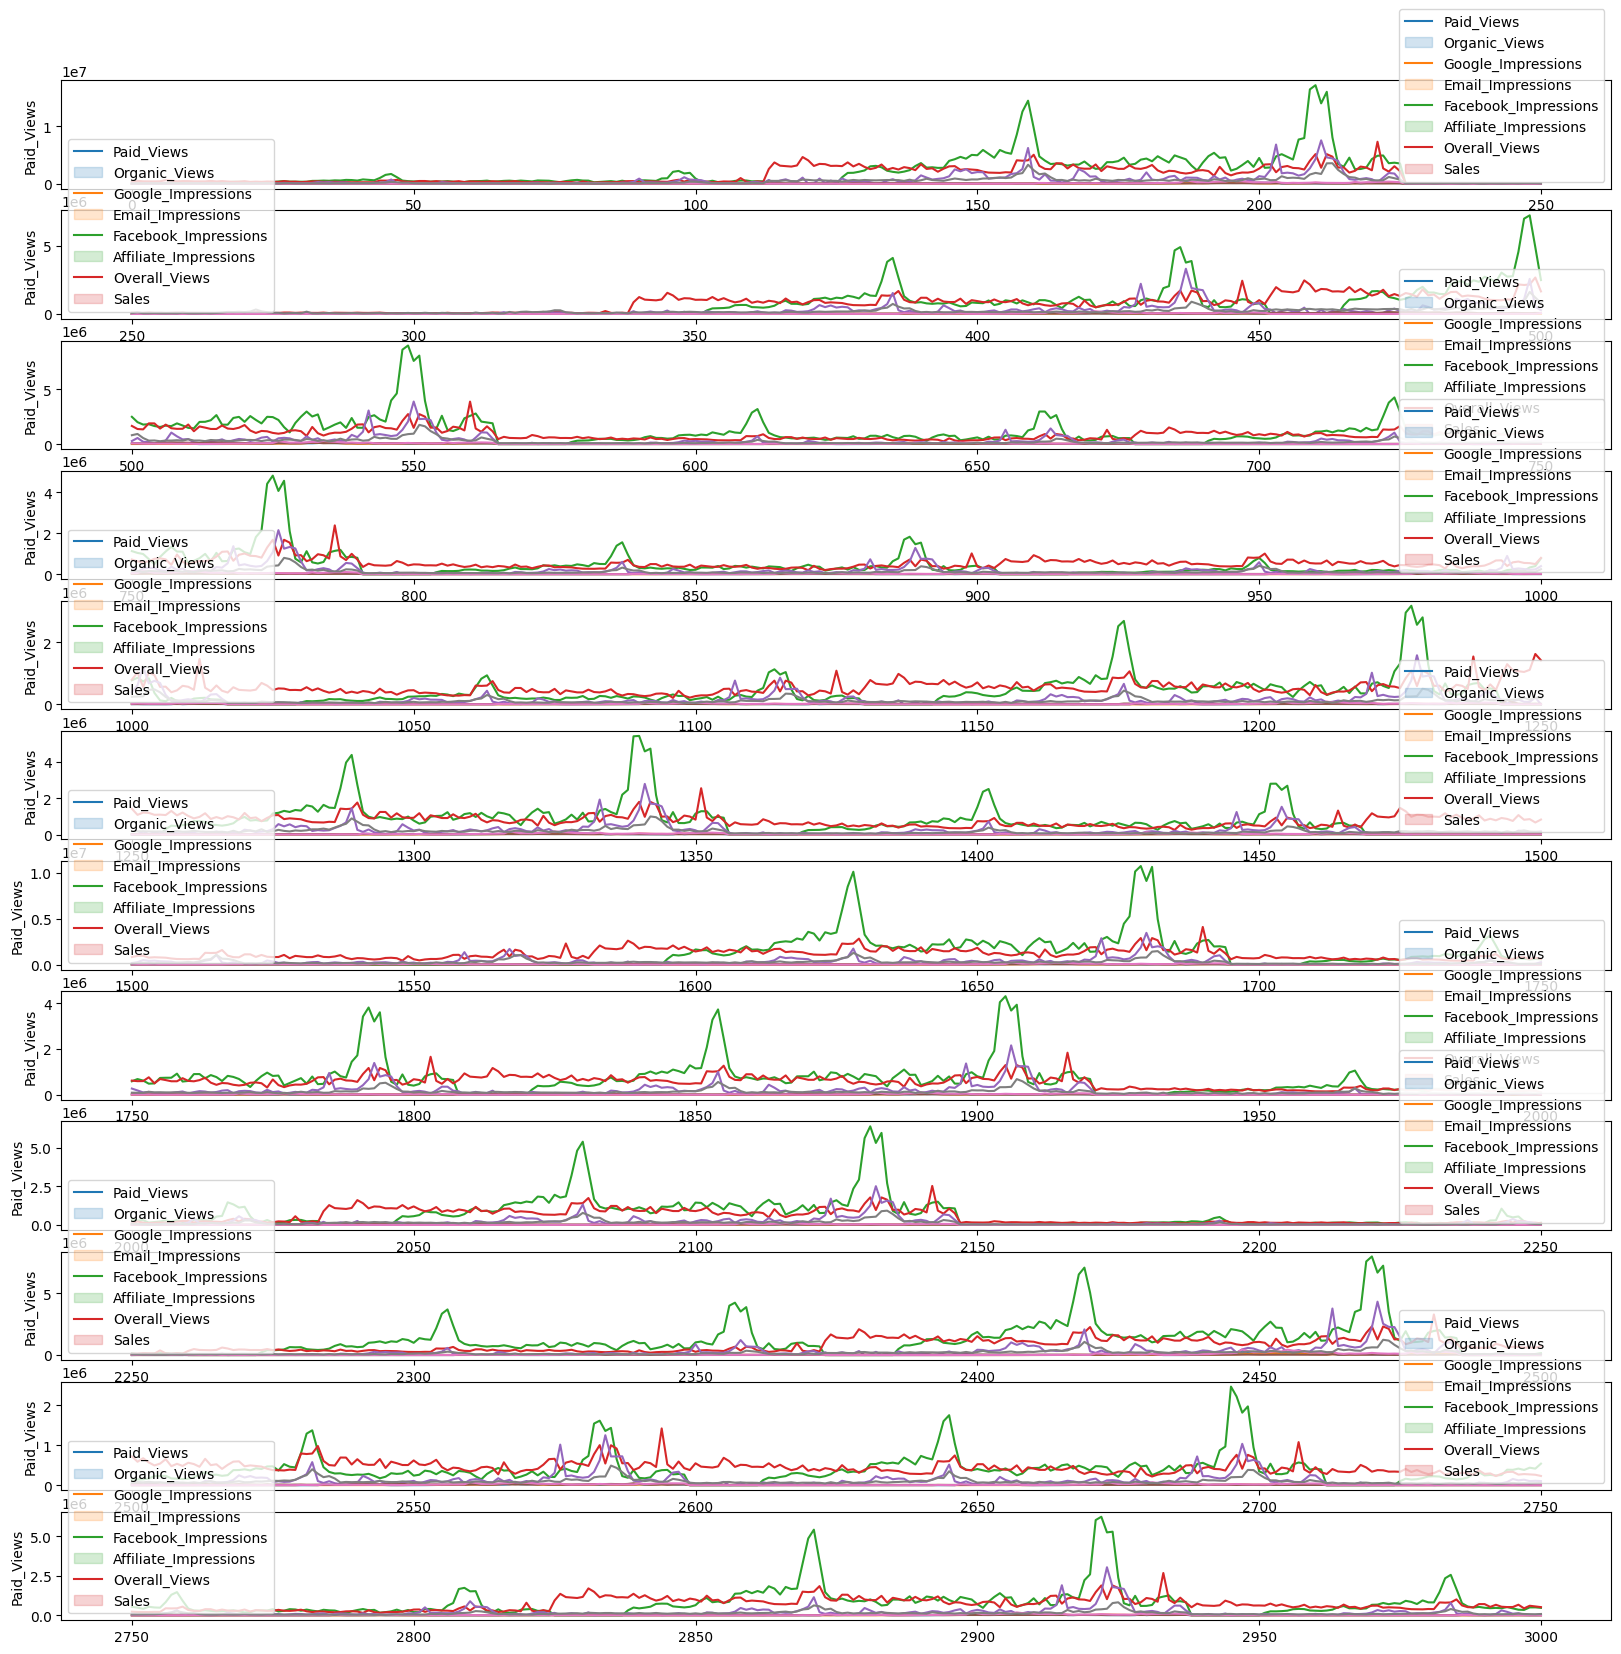

In [25]:
plt.figure(figsize=(20,20))
for n,section in enumerate(range(0,3000,250)):
    plt.subplot(12,1,n+1)
    for i in numeric_columns:
        x = df.loc[section:section+250,i]
        sns.lineplot(x)
    plt.legend(numeric_columns)